# Task-05: Survey Data Analysis
# Author: Ferzeen Tahir

### Introduction:

#### Objective:
The objective of this analysis is to explore the survey data on smoking behaviors to understand the relationships between smoking status and various demographic and socio-economic factors. The analysis will focus on examining the impact of factors such as gender, age groups, marital status, highest qualification, nationality, ethnicity, and gross income on smoking behaviors.

#### Dataset:
The dataset used for this analysis is the "smoking.csv," which contains information collected from a survey on smoking habits. The dataset contains 1,691 entries with the following 13 columns:

- **Unnamed: 0**: An index column that seems unnecessary.
- **Gender**: Gender of the respondent (Male/Female).
- **Age**: Age of the respondent.
- **Marital Status**: Marital status of the respondent (e.g., Single, Married).
- **Highest Qualification**: Highest educational qualification of the respondent.
- **Nationality**: Nationality of the respondent.
- **Ethnicity**: Ethnicity of the respondent.
- **Gross Income**: Gross income of the respondent.
- **Region**: The region where the respondents live.
- **Smoking Status**: Smoking status of the respondent (Yes/No).
- **Amt_Weekends**: Amount of smoking on weekends (for smokers).
- **Amt_Weekdays**: Amount of smoking on weekdays (for smokers).
- **Type**: Type of smoking product used (for smokers).

## Step-01: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency
warnings.filterwarnings('ignore')

## Step-02: Load Data

In [2]:
# Load the dataset
df = pd.read_csv('smoking.csv')

## Step-03: Data Inspection

In [3]:
# Display the first five rows of the dataset
df.head()

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [4]:
# Display the last five rows of the dataset
df.tail()

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
1686,1687,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,No,NaN,NaN,NaN
1687,1688,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Hand-Rolled
1688,1689,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,No,NaN,NaN,NaN
1689,1690,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Packets
1690,1691,Male,31,Married,Degree,Scottish,White,"10,400 to 15,600",Scotland,No,NaN,NaN,NaN


In [5]:
# Display the shape of the dataset (rows, columns)
df.shape

(1691, 13)

In [6]:
# Provide a statistical summary of the all columns
df.describe(include = 'all')

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
count,1691.000000,1691,1691.000000,1691,1691,1691,1691,1691,1691,1691,421.000000,421.000000,421
unique,NaN,2,NaN,5,8,8,7,10,7,2,NaN,NaN,4
top,NaN,Female,NaN,Married,No Qualification,English,White,"5,200 to 10,400",Midlands & East Anglia,No,NaN,NaN,Packets
freq,NaN,965,NaN,812,586,833,1560,396,443,1270,NaN,NaN,297
mean,846.000000,NaN,49.836192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.410926,13.750594,NaN
std,488.293969,NaN,18.736851,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.892988,9.388292,NaN
min,1.000000,NaN,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,423.500000,NaN,34.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,7.000000,NaN
50%,846.000000,NaN,48.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,12.000000,NaN
75%,1268.500000,NaN,65.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.000000,20.000000,NaN


In [7]:
# Display information about the dataset, including data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1691 non-null   int64  
 1   gender                 1691 non-null   object 
 2   age                    1691 non-null   int64  
 3   marital_status         1691 non-null   object 
 4   highest_qualification  1691 non-null   object 
 5   nationality            1691 non-null   object 
 6   ethnicity              1691 non-null   object 
 7   gross_income           1691 non-null   object 
 8   region                 1691 non-null   object 
 9   smoke                  1691 non-null   object 
 10  amt_weekends           421 non-null    float64
 11  amt_weekdays           421 non-null    float64
 12  type                   421 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 171.9+ KB


### Few Observations:
1. amt_weekends, amt_weekdays, and type columns have missing data because they only apply to those who smoke.
2. On weekends, smokers consume an average of 16.4 units (standard deviation: 9.9).
3. On weekdays, the average consumption is 13.8 units (standard deviation: 9.4).

## Step-04: Data Cleaning

### Handle Missing Values

In [8]:
# Detect missing values in the dataset
df.isnull().sum()

Unnamed: 0                  0
gender                      0
age                         0
marital_status              0
highest_qualification       0
nationality                 0
ethnicity                   0
gross_income                0
region                      0
smoke                       0
amt_weekends             1270
amt_weekdays             1270
type                     1270
dtype: int64

In [9]:
# Drop unnecessary column 'Unnamed: 0'
df.drop(columns=['Unnamed: 0'], inplace = True)

In [10]:
# Replace NaN values with 'None' in specific columns
df['amt_weekends'].fillna('0', inplace=True)
df['amt_weekdays'].fillna('0', inplace=True)
df['type'].fillna('Non-Smokers', inplace=True)

### Removing Duplicates

In [11]:
# Detect duplicate rows in the dataset
df.duplicated().sum()

21

In [12]:
# Remove duplicate rows from dataset
df.drop_duplicates(inplace = True)

In [13]:
# Display the shape of the dataset after removing duplicates
df.shape

(1670, 12)

## Step-05: Feature Engineering

In [14]:
# Create'age_groups' column by binning the 'age' column into categories
bins = [16,30,45,60,75,97]
labels = ['16-30', '31-45', '46-60', '61-75', '76-97']
df['age_groups'] = pd.cut(df['age'], bins = bins, labels = labels)
df

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type,age_groups
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,0,0,Non-Smokers,31-45
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets,31-45
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,0,0,Non-Smokers,31-45
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,0,0,Non-Smokers,31-45
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,0,0,Non-Smokers,31-45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686,Male,22,Single,No Qualification,Scottish,White,"2,600 to 5,200",Scotland,No,0,0,Non-Smokers,16-30
1687,Female,49,Divorced,Other/Sub Degree,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Hand-Rolled,46-60
1688,Male,45,Married,Other/Sub Degree,Scottish,White,"5,200 to 10,400",Scotland,No,0,0,Non-Smokers,31-45
1689,Female,51,Married,No Qualification,English,White,"2,600 to 5,200",Scotland,Yes,20.0,20.0,Packets,46-60


## Step-06: Exploratory Data Analysis (EDA)

### Univariate Analysis 

smoke
No     74.790419
Yes    25.209581
Name: count, dtype: float64


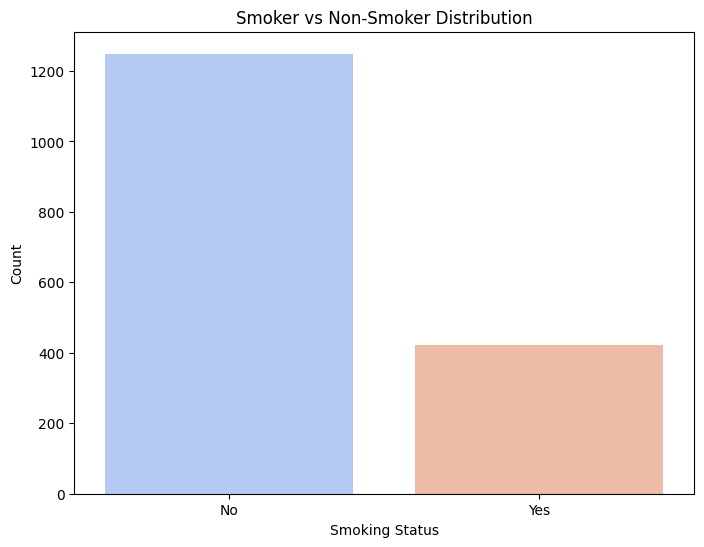

In [15]:
# Analyze the 'smoke' column
print(df['smoke'].value_counts() / len(df) * 100)

plt.figure(figsize=(8, 6))
sns.countplot(x='smoke', data=df, palette="coolwarm")
plt.title('Smoker vs Non-Smoker Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.show()

gender
Female    57.065868
Male      42.934132
Name: count, dtype: float64


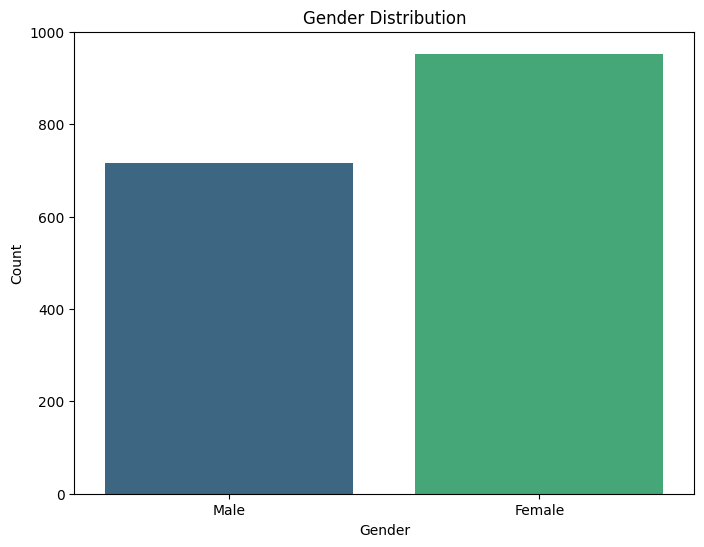

In [16]:
# Analyze the 'gender' column
print(df['gender'].value_counts() / len(df) * 100)

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=df, palette="viridis")
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

age_groups
31-45    29.520958
46-60    21.616766
61-75    20.718563
16-30    16.347305
76-97    10.958084
Name: count, dtype: float64


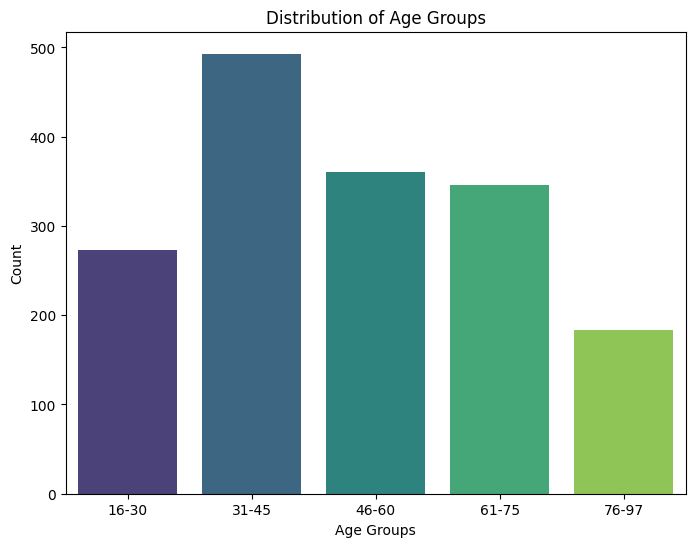

In [17]:
# Analyze the 'age_groups' column
print(df['age_groups'].value_counts() / len(df) * 100)

plt.figure(figsize=(8, 6))
sns.countplot(x='age_groups', data=df, palette="viridis")
plt.title('Distribution of Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.show()

marital_status
Married      47.964072
Single       25.389222
Widowed      12.934132
Divorced      9.640719
Separated     4.071856
Name: count, dtype: float64


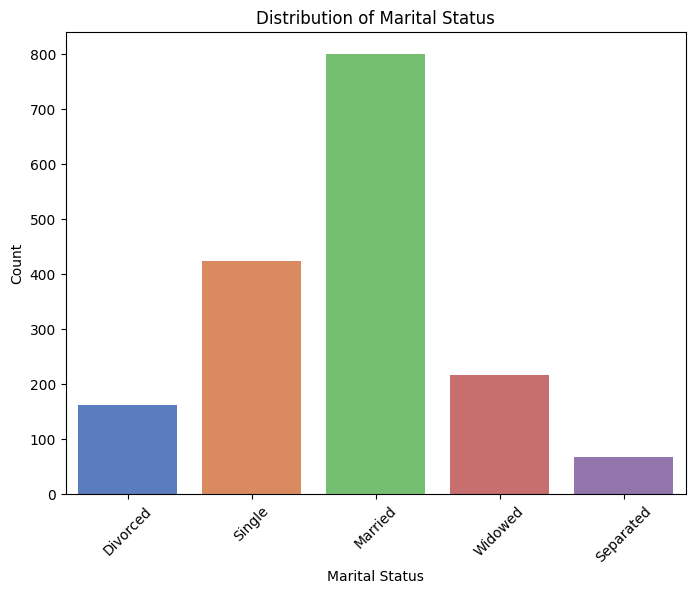

In [18]:
# Analyze the 'marital_status' column
print(df['marital_status'].value_counts() / len(df) * 100)

plt.figure(figsize=(8, 6))
sns.countplot(x='marital_status', data=df, palette="muted")
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

highest_qualification
No Qualification     34.371257
GCSE/O Level         18.263473
Degree               15.508982
Other/Sub Degree      7.604790
Higher/Sub Degree     7.425150
A Levels              6.287425
GCSE/CSE              6.107784
ONC/BTEC              4.431138
Name: count, dtype: float64


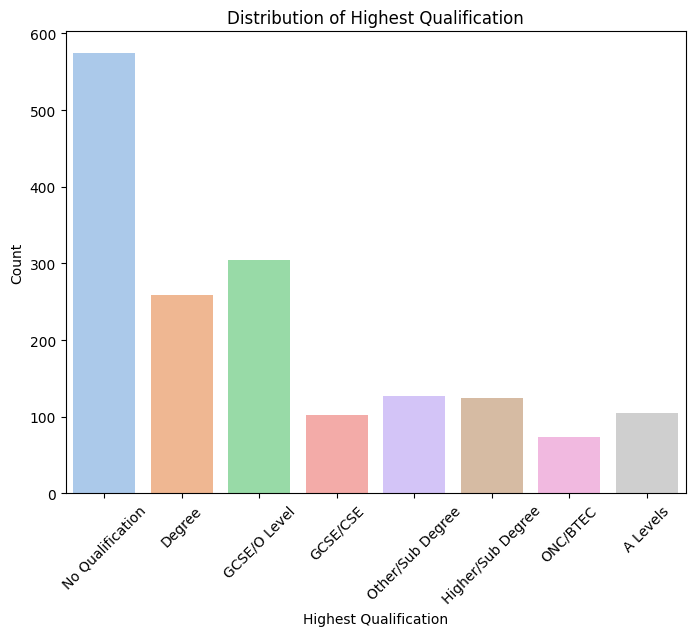

In [19]:
# Analyze the 'highest_qualification' column
print(df['highest_qualification'].value_counts() / len(df) * 100)

plt.figure(figsize=(8, 6))
sns.countplot(x='highest_qualification', data=df, palette="pastel")
plt.title('Distribution of Highest Qualification')
plt.xlabel('Highest Qualification')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

nationality
English     48.982036
British     31.916168
Scottish     8.502994
Other        4.191617
Welsh        3.952096
Irish        1.377246
Refused      1.017964
Unknown      0.059880
Name: count, dtype: float64


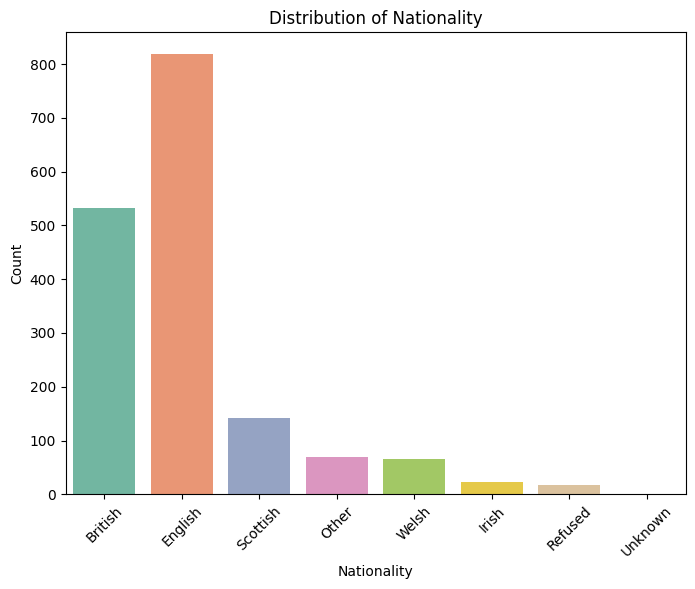

In [20]:
# Analyze the 'nationality' column
print(df['nationality'].value_counts() / len(df) * 100)

plt.figure(figsize=(8, 6))
sns.countplot(x='nationality', data=df, palette="Set2")
plt.title('Distribution of Nationality')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

ethnicity
White      92.155689
Asian       2.455090
Black       2.035928
Chinese     1.616766
Mixed       0.838323
Refused     0.778443
Unknown     0.119760
Name: count, dtype: float64


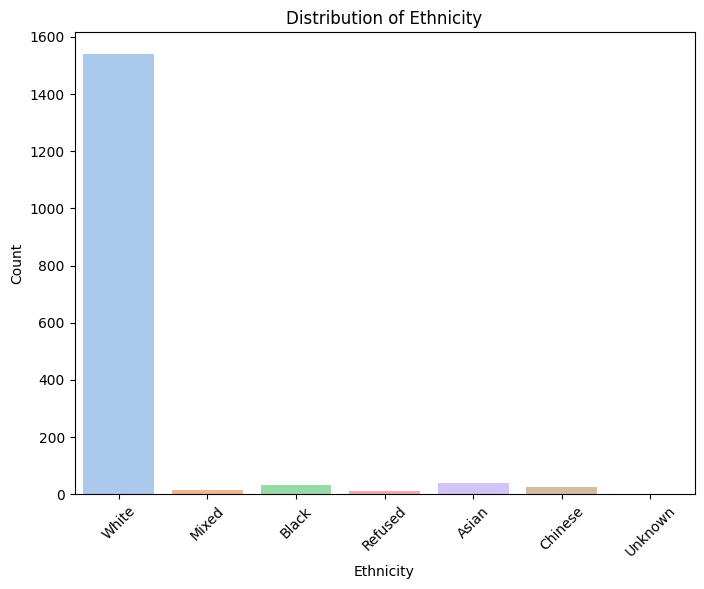

In [21]:
# Analyze the 'ethnicity' column
print(df['ethnicity'].value_counts() / len(df) * 100)

plt.figure(figsize=(8, 6))
sns.countplot(x='ethnicity', data=df, palette="pastel")
plt.title('Distribution of Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

gross_income
5,200 to 10,400     23.233533
10,400 to 15,600    15.988024
2,600 to 5,200      15.269461
15,600 to 20,800    11.137725
20,800 to 28,600     9.281437
Under 2,600          7.784431
Refused              6.347305
Above 36,400         5.149701
28,600 to 36,400     4.730539
Unknown              1.077844
Name: count, dtype: float64


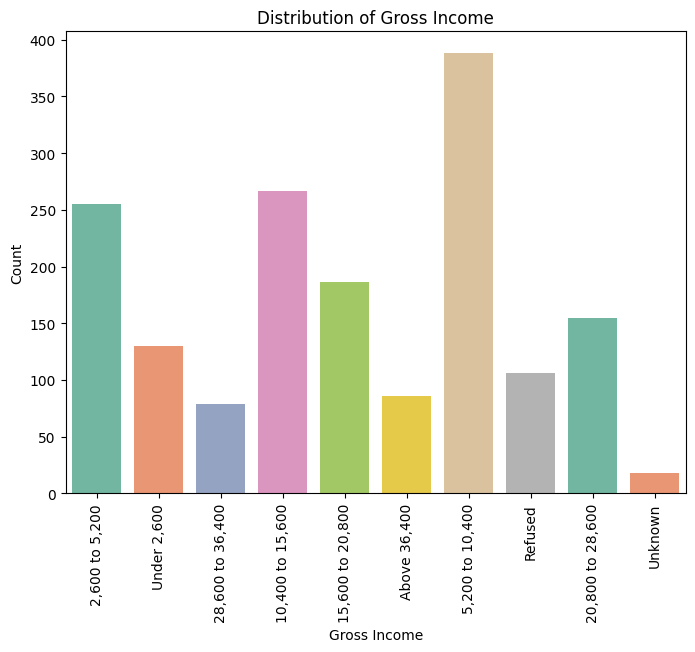

In [22]:
# Analyze the 'gross_income' column
print(df['gross_income'].value_counts() / len(df) * 100)

plt.figure(figsize=(8, 6))
sns.countplot(x='gross_income', data=df, palette="Set2")
plt.title('Distribution of Gross Income')
plt.xlabel('Gross Income')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

type
Non-Smokers                74.790419
Packets                    17.784431
Hand-Rolled                 4.311377
Both/Mainly Packets         2.514970
Both/Mainly Hand-Rolled     0.598802
Name: count, dtype: float64


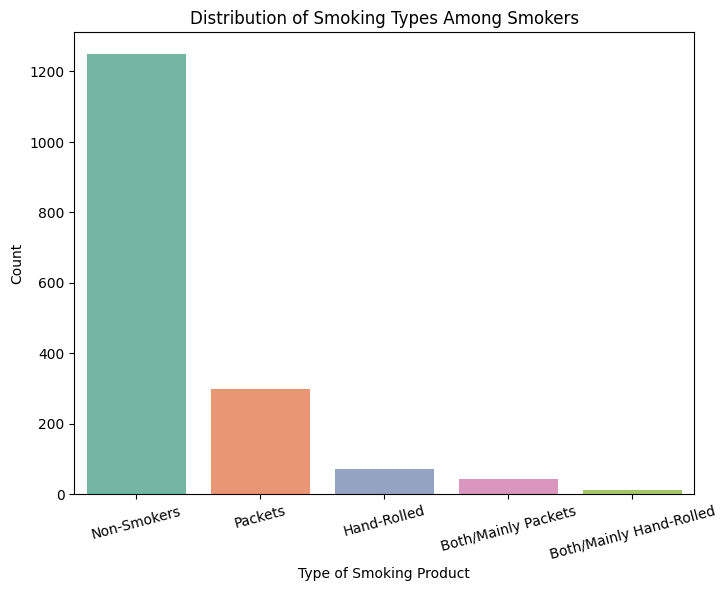

In [23]:
# Analyze the 'type' column
print(df['type'].value_counts() / len(df) * 100)

plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette="Set2")
plt.title('Distribution of Smoking Types Among Smokers')
plt.xlabel('Type of Smoking Product')
plt.ylabel('Count')
plt.xticks(rotation = 15)
plt.show()

### Few Observations:
1. Approximately 74.7% of the respondents do not smoke, while 25.2% do.
2. 57.0% of respondents are female, and 42.9% are male.
3. The largest age group is 31-45 years (29.5%), followed by 46-60 years (21.6%).
4. 47.9% of the respondents are married, and 25.3% are single.
5. 34.3% of respondents have no qualifications.
6. Most respondents are English (48.9%), followed by British (31.9%). 
7. 92.1% of the respondents are White.
8. 23.2% of respondents have a gross income in the range of 5,200 to 10,400. 
9. Most smokers use packets (17.7%), with smaller percentages using hand-rolled, both types, or mainly packets.

### Bivariate Analysis

smoke     No   Yes
gender            
Female  43.1  14.0
Male    31.7  11.2


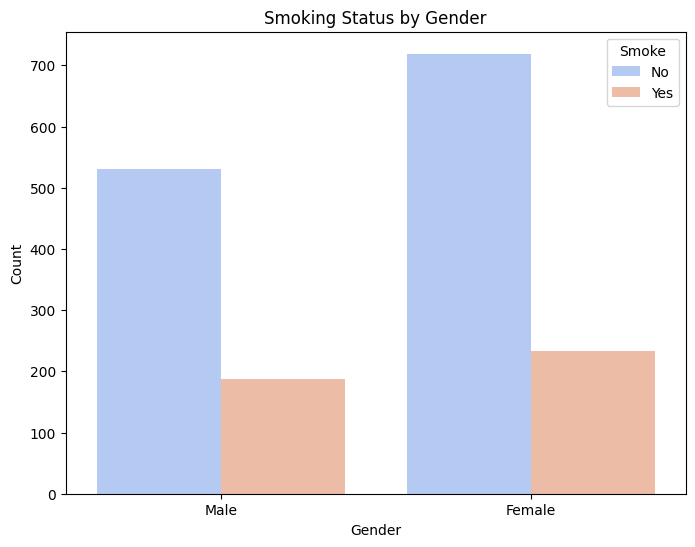

In [24]:
# Analyze smoking status with respect to 'gender'
print(round((df.groupby('gender')['smoke'].value_counts() / len(df) * 100), 1).unstack())

plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='smoke', data=df, palette="coolwarm")
plt.title('Smoking Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title ='Smoke')
plt.show()


smoke         No  Yes
age_groups           
16-30       10.1  6.3
31-45       20.8  8.7
46-60       15.7  5.9
61-75       17.6  3.1
76-97       10.0  1.0


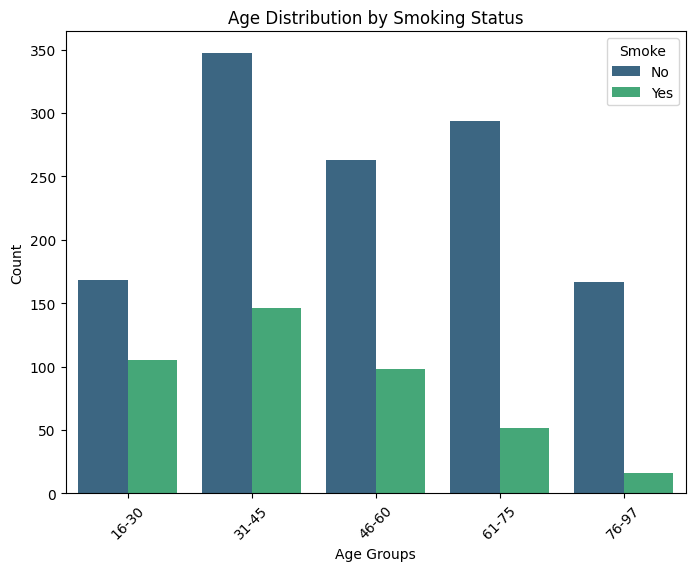

In [25]:
# Analyze smoking status with respect to 'age_groups'
print(round((df.groupby('age_groups')['smoke'].value_counts() / len(df) * 100), 1).unstack())

plt.figure(figsize=(8, 6))
sns.countplot(x='age_groups', hue='smoke', data=df, palette="viridis")
plt.title('Age Distribution by Smoking Status')
plt.xlabel('Age Groups')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.legend(title ='Smoke')
plt.show()

smoke             No  Yes
marital_status           
Divorced         6.2  3.5
Married         39.4  8.6
Separated        2.8  1.3
Single          15.9  9.5
Widowed         10.5  2.4


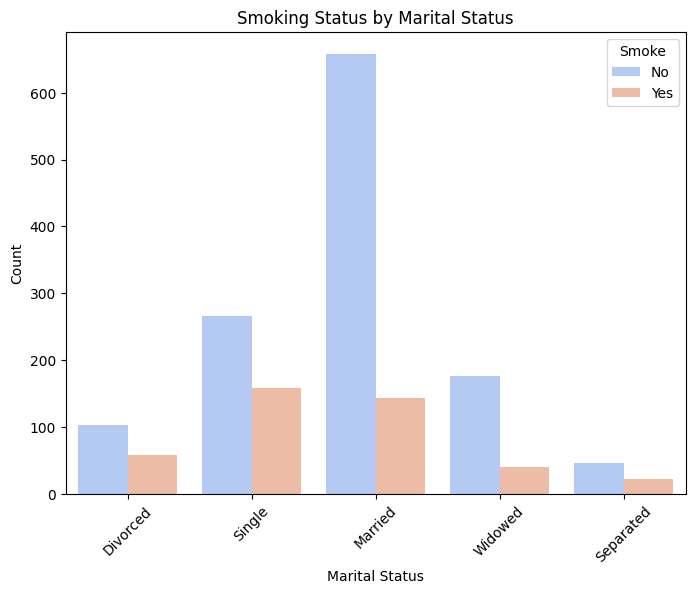

In [26]:
# Analyze smoking status with respect to 'marital_status'
print(round((df.groupby('marital_status')['smoke'].value_counts() / len(df) * 100), 1).unstack())

plt.figure(figsize=(8, 6))
sns.countplot(x='marital_status', hue='smoke', data=df, palette="coolwarm")
plt.title('Smoking Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.legend(title ='Smoke')
plt.show()

smoke                    No  Yes
highest_qualification           
A Levels                5.0  1.3
Degree                 13.2  2.3
GCSE/CSE                3.8  2.3
GCSE/O Level           12.0  6.3
Higher/Sub Degree       5.8  1.6
No Qualification       26.2  8.2
ONC/BTEC                3.1  1.4
Other/Sub Degree        5.7  1.9


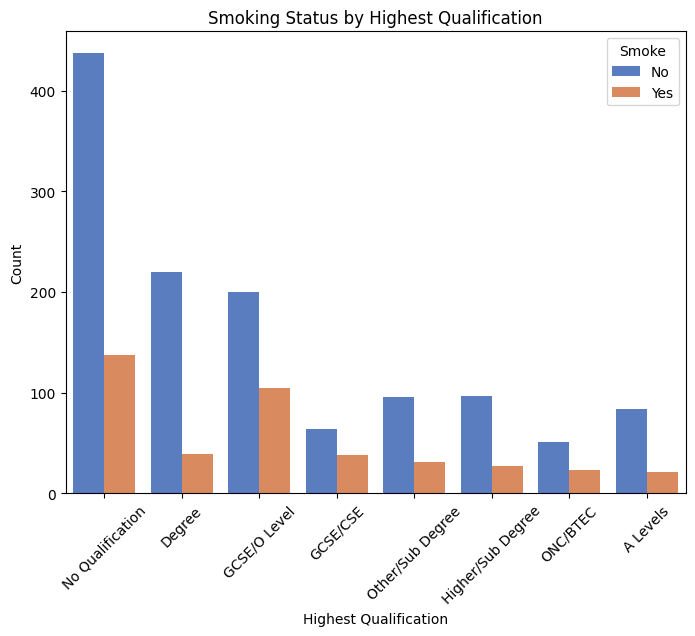

In [27]:
# Analyze smoking status with respect to 'highest_qualification'
print(round((df.groupby('highest_qualification')['smoke'].value_counts() / len(df) * 100), 1).unstack())

plt.figure(figsize=(8, 6))
sns.countplot(x='highest_qualification', hue='smoke', data=df, palette="muted")
plt.title('Smoking Status by Highest Qualification')
plt.xlabel('Highest Qualification')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.legend(title ='Smoke')
plt.show()

smoke          No   Yes
nationality            
British      24.2   7.7
English      36.9  12.1
Irish         0.7   0.7
Other         3.4   0.8
Refused       0.8   0.2
Scottish      5.8   2.7
Unknown       NaN   0.1
Welsh         3.0   1.0


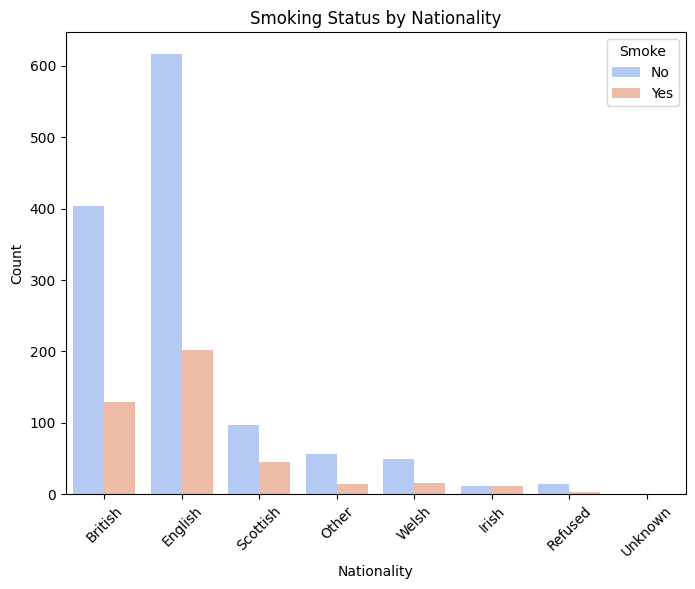

In [28]:
# Analyze smoking status with respect to 'nationality'
print(round((df.groupby('nationality')['smoke'].value_counts() / len(df) * 100), 1).unstack())

plt.figure(figsize=(8, 6))
sns.countplot(x='nationality', hue='smoke', data=df, palette="coolwarm")
plt.title('Smoking Status by Nationality')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.legend(title ='Smoke')
plt.show()

smoke        No   Yes
ethnicity            
Asian       2.0   0.5
Black       1.6   0.5
Chinese     1.3   0.3
Mixed       0.5   0.3
Refused     0.5   0.2
Unknown     0.1   0.1
White      68.8  23.4


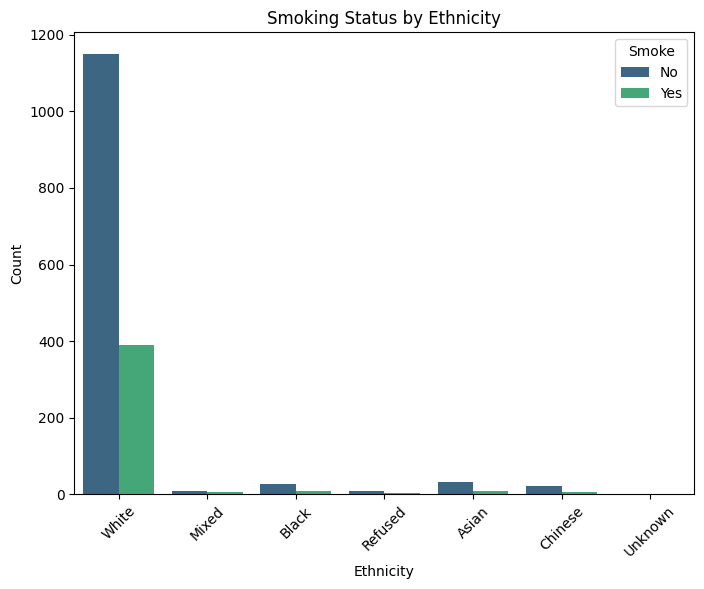

In [29]:
# Analyze smoking status with respect to 'ethnicity'
print(round((df.groupby('ethnicity')['smoke'].value_counts() / len(df) * 100), 1).unstack())

plt.figure(figsize=(8, 6))
sns.countplot(x='ethnicity', hue='smoke', data=df, palette="viridis")
plt.title('Smoking Status by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.legend(title ='Smoke')
plt.show()

smoke               No  Yes
gross_income               
10,400 to 15,600  11.0  5.0
15,600 to 20,800   8.4  2.7
2,600 to 5,200    11.4  3.8
20,800 to 28,600   7.0  2.3
28,600 to 36,400   4.2  0.5
5,200 to 10,400   16.8  6.4
Above 36,400       4.3  0.9
Refused            5.1  1.3
Under 2,600        5.6  2.2
Unknown            0.9  0.2


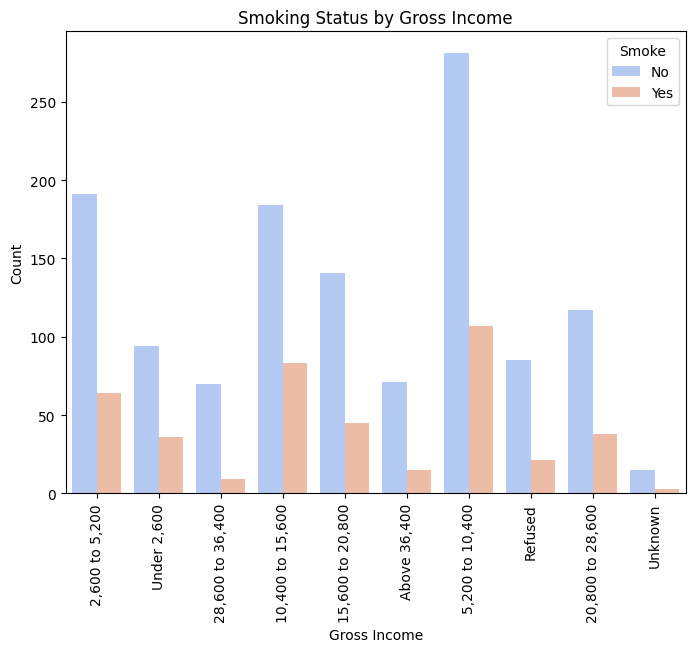

In [30]:
# Analyze smoking status with respect to 'gross_income'
print(round((df.groupby('gross_income')['smoke'].value_counts() / len(df) * 100), 1).unstack())

plt.figure(figsize=(8, 6))
sns.countplot(x='gross_income', hue='smoke', data=df, palette="coolwarm")
plt.title('Smoking Status by Gross Income')
plt.xlabel('Gross Income')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.legend(title ='Smoke')
plt.show()

### Few Observations:
1. Among non-smokers, 43.1% are female and 31.7% are male. 
2. Smoking is most common in the 31-45 age group (8.7%), followed by 16-30 age group (6.3%), with rates decreasing in older age groups.
3. Single individuals have the highest smoking rate (9.5%), while married individuals smoke less (8.6%).
4. Those with no qualifications have the highest smoking prevalence (8.2%).
5. English nationals have the highest smoking rate (12.1%), followed by British nationals (7.7%).
6. Smoking is most prevalent among the White ethnic group (23.4%).
7. Smoking prevalence is higher among lower and middle-income individuals.

## Step-07: Chi-Square Test for Independence

In [31]:
def chi_square_test(df, column_name):
    # Create contingency table
    contingency_table = pd.crosstab(df[column_name], df['smoke'])
    
    # Perform Chi-Square Test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    return chi2, p_value

# List of categorical columns to test
categorical_columns = ['gender', 'marital_status', 'highest_qualification', 'nationality', 'ethnicity', 'age_groups', 'gross_income']

# Dictionary to store results
results = {}
for column in categorical_columns:
    chi2_stat, p_value = chi_square_test(df, column)
    results[column] = {'Chi-Square Statistic': chi2_stat, 'P-Value': p_value}

# Print results with interpretation
for column, result in results.items():
    interpretation = "No significant association" if result['P-Value'] > 0.05 else "Significant association"
    print(f"Column: {column}")
    print(f"  Chi-Square Statistic: {result['Chi-Square Statistic']:.4f}")
    print(f"  P-Value: {result['P-Value']:.4f} ({interpretation})\n")


Column: gender
  Chi-Square Statistic: 0.4282
  P-Value: 0.5129 (No significant association)

Column: marital_status
  Chi-Square Statistic: 72.6295
  P-Value: 0.0000 (Significant association)

Column: highest_qualification
  Chi-Square Statistic: 39.9795
  P-Value: 0.0000 (Significant association)

Column: nationality
  Chi-Square Statistic: 14.3273
  P-Value: 0.0457 (Significant association)

Column: ethnicity
  Chi-Square Statistic: 3.0964
  P-Value: 0.7967 (No significant association)

Column: age_groups
  Chi-Square Statistic: 76.6142
  P-Value: 0.0000 (Significant association)

Column: gross_income
  Chi-Square Statistic: 19.6987
  P-Value: 0.0199 (Significant association)



### Few Observations:
1. No significant association between gender and smoking status (p-value = 0.5129).
2. Significant association between marital status and smoking status (p-value = 0.0000).
3. Significant association between highest qualification and smoking status (p-value = 0.0000).
4. Significant association between nationality and smoking status (p-value = 0.0457).
5. No significant association between ethnicity and smoking status (p-value = 0.7967).
6. Significant association between age groups and smoking status (p-value = 0.0000).
7. Significant association between gross income and smoking status (p-value = 0.0199).

## Conclusions:
* Gender does not significantly influence smoking status, suggesting smoking rates are relatively even across genders.
* Marital status, highest qualification, age groups, and gross income all show significant associations with smoking status. 
* Nationality also has a significant association with smoking, with English nationals showing a higher smoking rate.
* Ethnicity does not have a significant association with smoking status, indicating that smoking prevalence might be similar across different ethnic groups.